In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



## DATA READING AND PREPROCESSING

**Daily electricity Consumption**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # module for plotting
import numpy.linalg as lin # module for performing linear algebra operations
from __future__ import division
from math import log10,exp

#Daily consumption
raw_data = pd.read_excel("/content/drive/MyDrive/SolarGeneration_Data (2).xlsx",sheet_name=2)
raw_data.head(10)

,TIMESTAMP,Solar_Power_Consumption(Kw)
0,2019-05-14 12:10:00.000,32.055000
1,2019-05-14 12:09:00.007,26.976000
2,2019-05-14 12:08:00.003,31.302999
3,2019-05-14 12:07:00.940,37.044998
4,2019-05-14 12:06:00.737,38.083000
5,2019-05-14 12:05:00.530,38.153999
6,2019-05-14 12:04:00.270,38.240002
7,2019-05-14 12:03:00.020,38.162998
8,2019-05-14 12:02:00.800,38.304001
9,2019-05-14 12:01:00.550,38.443001


In [45]:
raw_data['TimeReviewed'] = pd.to_datetime(raw_data['TIMESTAMP'])
raw_data = raw_data.set_index('TimeReviewed')
raw_data.drop(['TIMESTAMP'], axis=1, inplace=True)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 292646 entries, 2019-05-14 12:10:00 to 2017-12-26 06:38:00.003000
Data columns (total 1 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Solar_Power_Consumption(Kw)  292646 non-null  float64
dtypes: float64(1)
memory usage: 4.5 MB


In [46]:
energydaily = raw_data.resample('D').sum()
energydaily.rename(columns = {"Solar_Power_Consumption(Kw)": "Solar_Power_Consumption(Kwh)"})


,Solar_Power_Consumption(Kwh)
TimeReviewed,
2017-12-26,12782.411988
2017-12-27,13883.010020
2017-12-28,13766.083029
2017-12-29,12904.092990
2017-12-30,7985.972000
...,...
2019-05-10,15619.215017
2019-05-11,9179.519970
2019-05-12,0.000000


<Figure size 640x480 with 0 Axes>

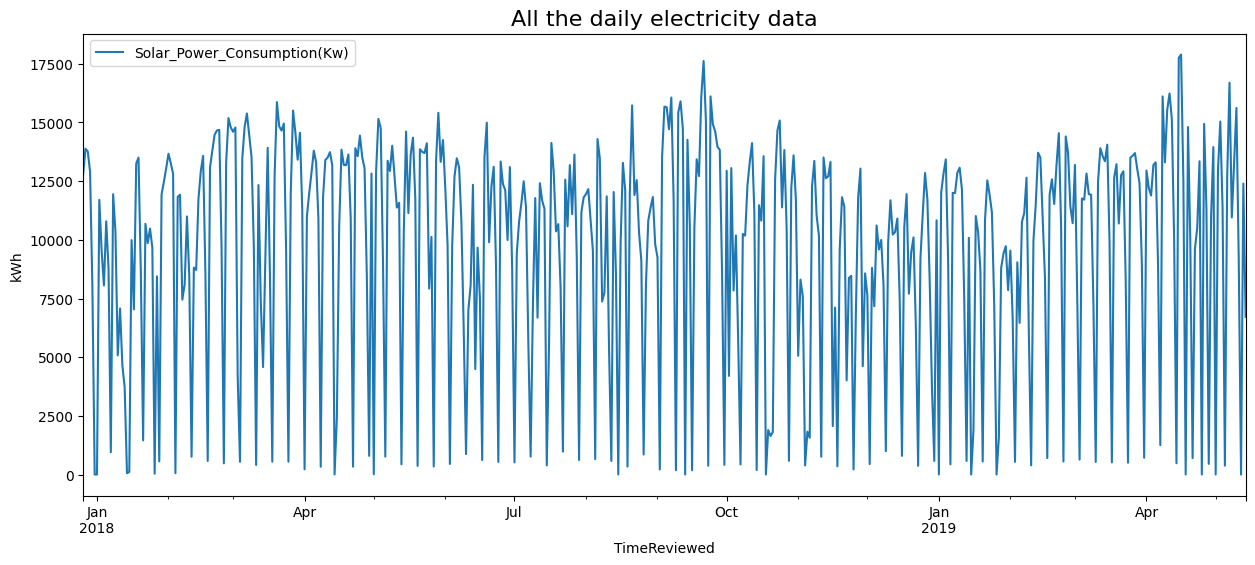

<Figure size 640x480 with 0 Axes>

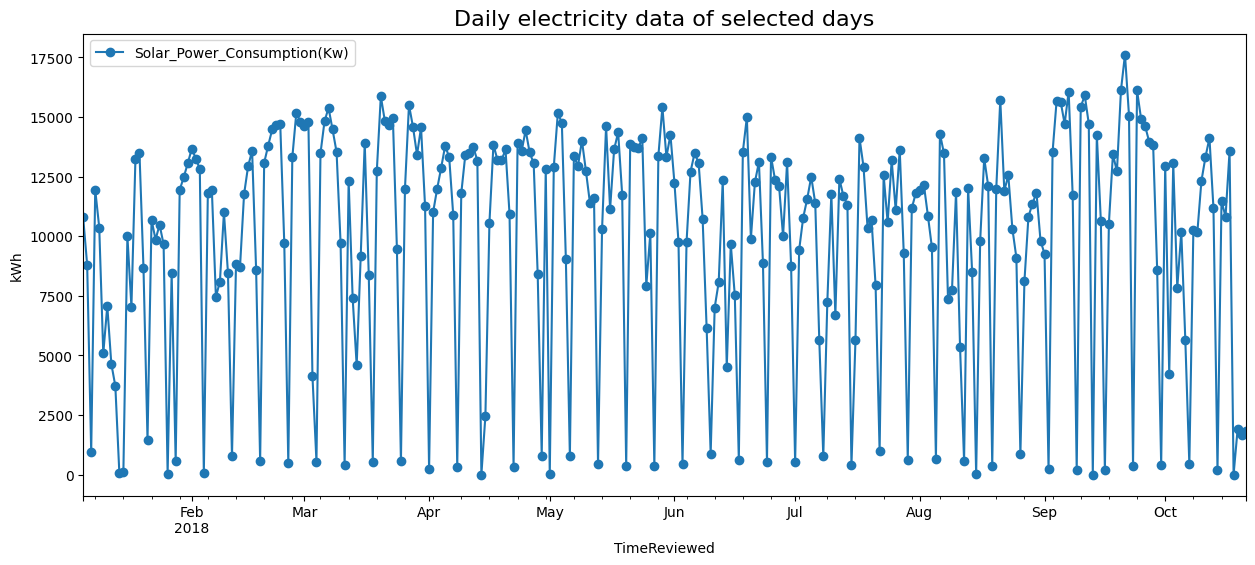

In [49]:
plt.figure()
fig = energydaily.plot(figsize = (15, 6))
plt.title('All the daily electricity data', fontsize = 16)
plt.ylabel('kWh')
plt.show()

plt.figure()
fig = energydaily.iloc[10:300,:].plot(marker = 'o', figsize = (15, 6))
plt.title('Daily electricity data of selected days', fontsize = 16)
plt.ylabel('kWh')
plt.show()

**Hourly consumption analysis**

In [50]:
energyhourly = raw_data.resample('H').sum()
energyhourly.rename(columns = {"Solar_Power_Consumption(Kw)": "Solar_Power_Consumption(Kwh)"})

<ipython-input-50-7ce392626319>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  energyhourly = raw_data.resample('H').sum()


,Solar_Power_Consumption(Kwh)
TimeReviewed,
2017-12-26 06:00:00,12.267000
2017-12-26 07:00:00,259.792000
2017-12-26 08:00:00,763.362001
2017-12-26 09:00:00,1375.903006
2017-12-26 10:00:00,1719.122997
...,...
2019-05-14 08:00:00,650.538997
2019-05-14 09:00:00,1390.019003
2019-05-14 10:00:00,1739.818999


<Figure size 640x480 with 0 Axes>

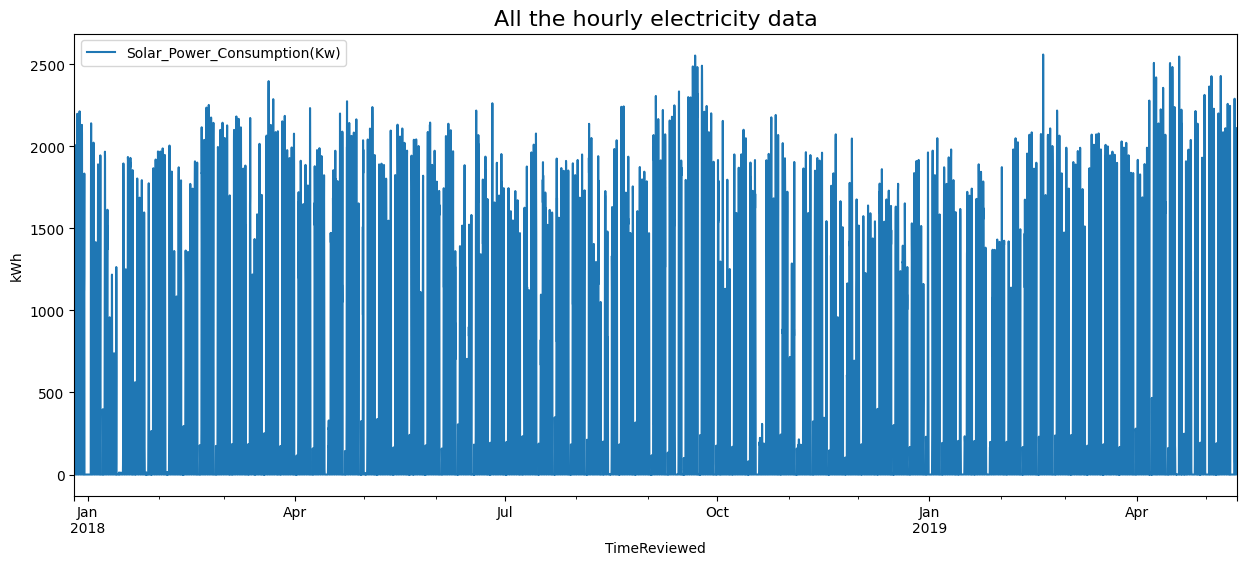

<Figure size 640x480 with 0 Axes>

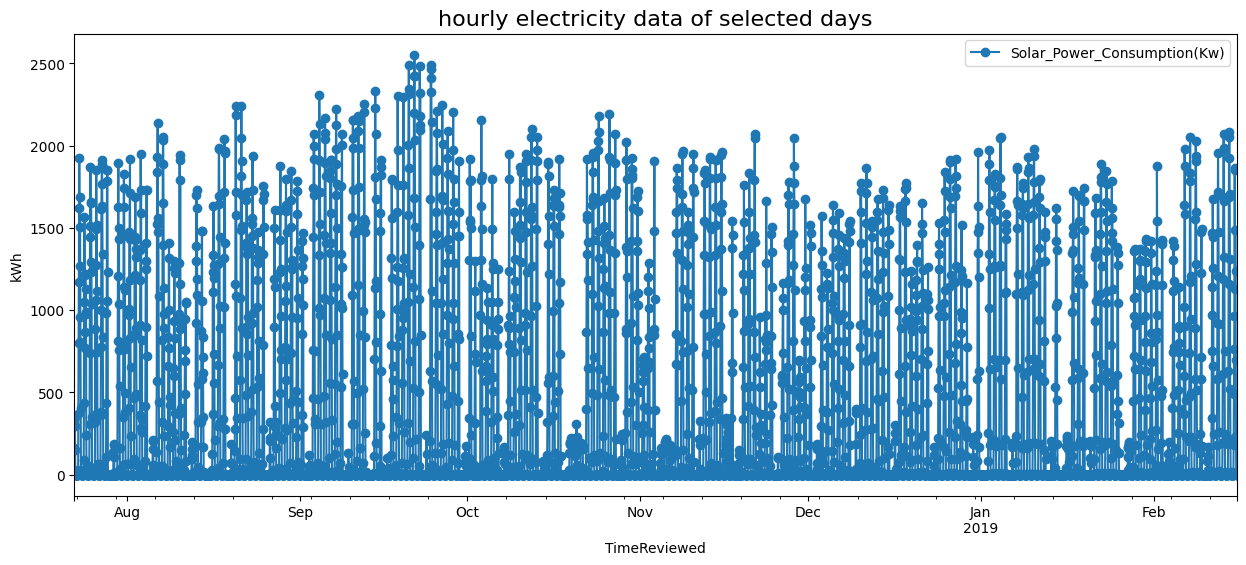

In [51]:
plt.figure()
fig = energyhourly.plot(figsize = (15, 6))
plt.title('All the hourly electricity data', fontsize = 16)
plt.ylabel('kWh')
plt.show()

plt.figure()
fig = energyhourly.iloc[5000:10000,:].plot(marker = 'o', figsize = (15, 6))
plt.title('hourly electricity data of selected days', fontsize = 16)
plt.ylabel('kWh')
plt.show()

<ipython-input-52-668b61f7fb9d>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  energyhourly['Solar_Power_Consumption(Kw)'].resample('M').mean().plot(kind='bar')


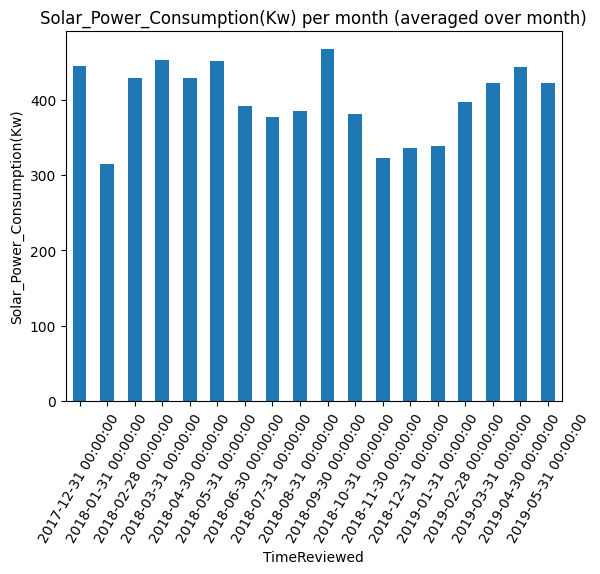

In [52]:
energyhourly['Solar_Power_Consumption(Kw)'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Solar_Power_Consumption(Kw)')
plt.title('Solar_Power_Consumption(Kw) per month (averaged over month)')
plt.show()

<ipython-input-53-05e51f0cca0d>:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  energyhourly['Solar_Power_Consumption(Kw)'].resample('Q').mean().plot(kind='bar')


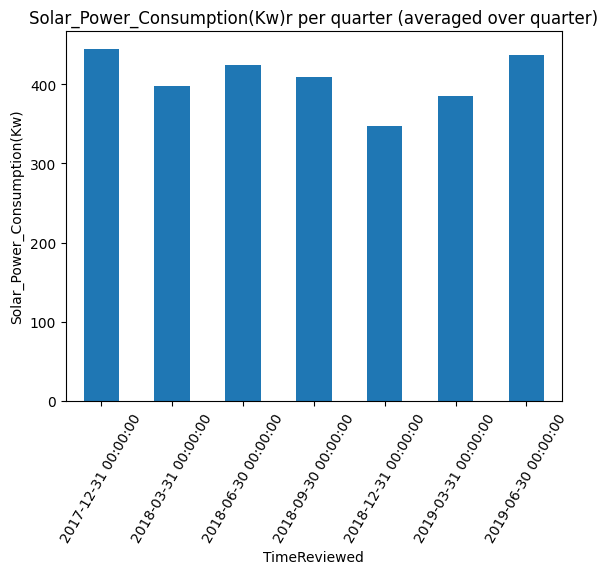

In [53]:
energyhourly['Solar_Power_Consumption(Kw)'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Solar_Power_Consumption(Kw)')
plt.title('Solar_Power_Consumption(Kw)r per quarter (averaged over quarter)')
plt.show()

**Weather data preprocessing**

In [54]:
weather_data= pd.read_excel("/content/drive/MyDrive/SolarGeneration_Data (2).xlsx",sheet_name=3)
weather_data.rename(columns = {"Value": "Temp(C)"})


,TimeStamp,Temp( C)
0,2019-05-14 12:00:00.063,26
1,2019-05-14 11:45:00.023,26
2,2019-05-14 11:30:00.033,26
3,2019-05-14 11:15:00.027,26
4,2019-05-14 11:00:00.067,26
...,...,...
47773,2017-12-26 01:00:00.033,26
47774,2017-12-26 00:45:00.020,26
47775,2017-12-26 00:30:00.017,26
47776,2017-12-26 00:15:00.033,26


In [55]:
weather_data['TimeReviewed'] = pd.to_datetime(weather_data['TimeStamp'])
weather_data = weather_data.set_index('TimeReviewed')
weather_data.drop(['TimeStamp'], axis=1, inplace=True)
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47778 entries, 2019-05-14 12:00:00.063000 to 2017-12-26 00:00:00.047000
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Temp( C)  47778 non-null  int64
dtypes: int64(1)
memory usage: 746.5 KB


**Hourly Temperature**

In [56]:
weatherhourly = weather_data.resample('H').mean()
weatherhourly

<ipython-input-56-59b9ca369964>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  weatherhourly = weather_data.resample('H').mean()


,Temp( C)
TimeReviewed,
2017-12-26 00:00:00,26.0
2017-12-26 01:00:00,26.0
2017-12-26 02:00:00,26.0
2017-12-26 03:00:00,26.0
2017-12-26 04:00:00,26.0
...,...
2019-05-14 08:00:00,28.0
2019-05-14 09:00:00,28.0
2019-05-14 10:00:00,28.0


<Figure size 640x480 with 0 Axes>

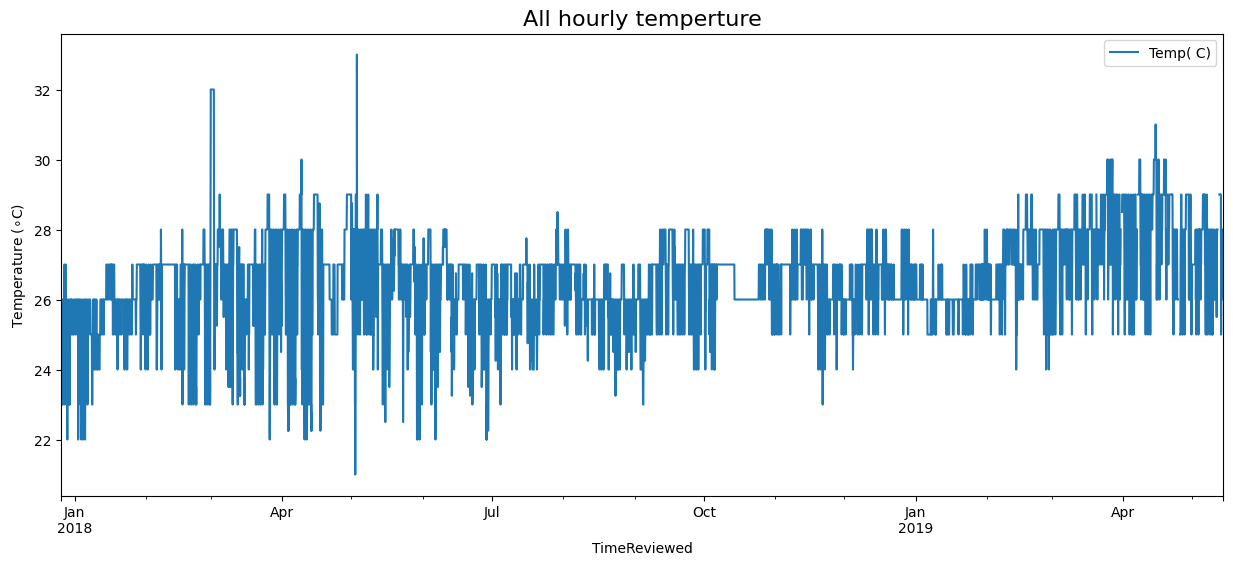

<Figure size 640x480 with 0 Axes>

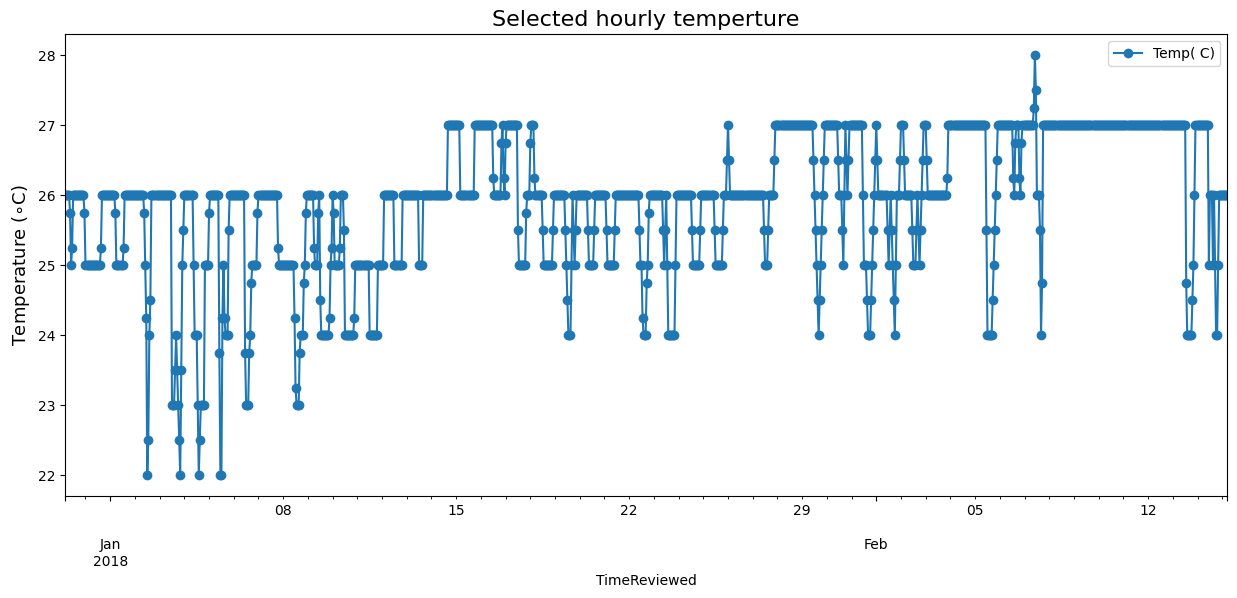

In [57]:
plt.figure()
fig = weatherhourly.plot(y = 'Temp( C)', figsize = (15, 6))
plt.title('All hourly temperture', fontsize = 16)
plt.ylabel(r'Temperature ($\circ$C)')
plt.show()


plt.figure()
fig = weatherhourly.iloc[100:1230].plot(y = 'Temp( C)', figsize = (15, 6), marker = 'o')
plt.title('Selected hourly temperture',fontsize = 16)
plt.ylabel(r'Temperature ($\circ$C)',fontsize = 13)
plt.show()


**daily temperature**

In [58]:
weatherdaily = weather_data.resample('D').mean()
weatherdaily

,Temp( C)
TimeReviewed,
2017-12-26,25.000000
2017-12-27,25.375000
2017-12-28,24.833333
2017-12-29,24.833333
2017-12-30,25.906250
...,...
2019-05-10,27.041667
2019-05-11,26.662921
2019-05-12,29.000000


<Figure size 640x480 with 0 Axes>

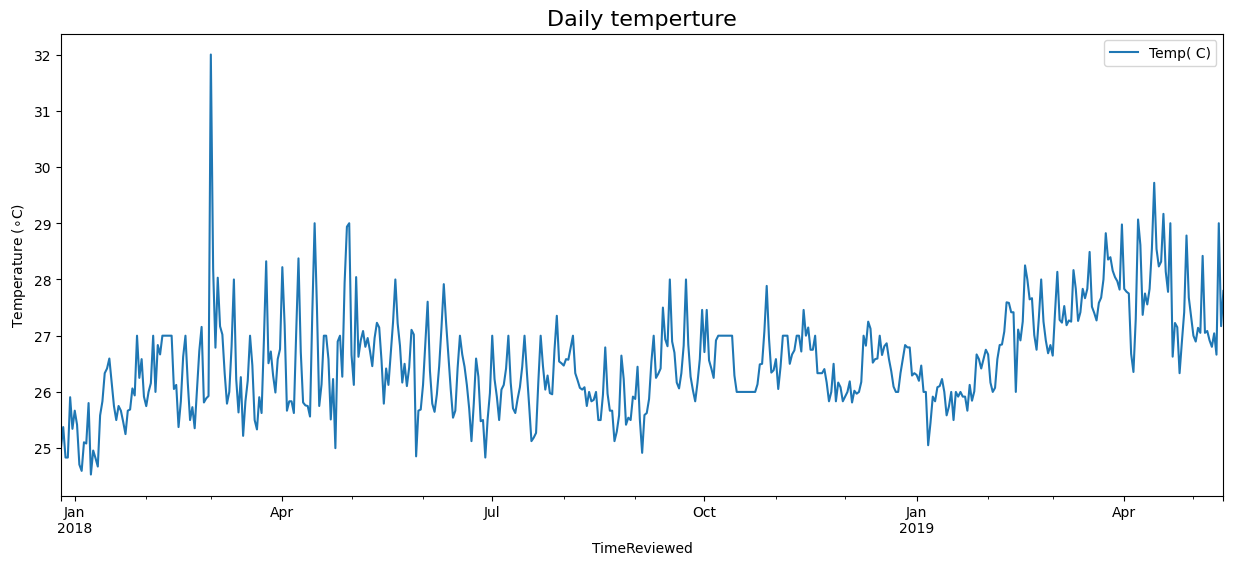

<Figure size 640x480 with 0 Axes>

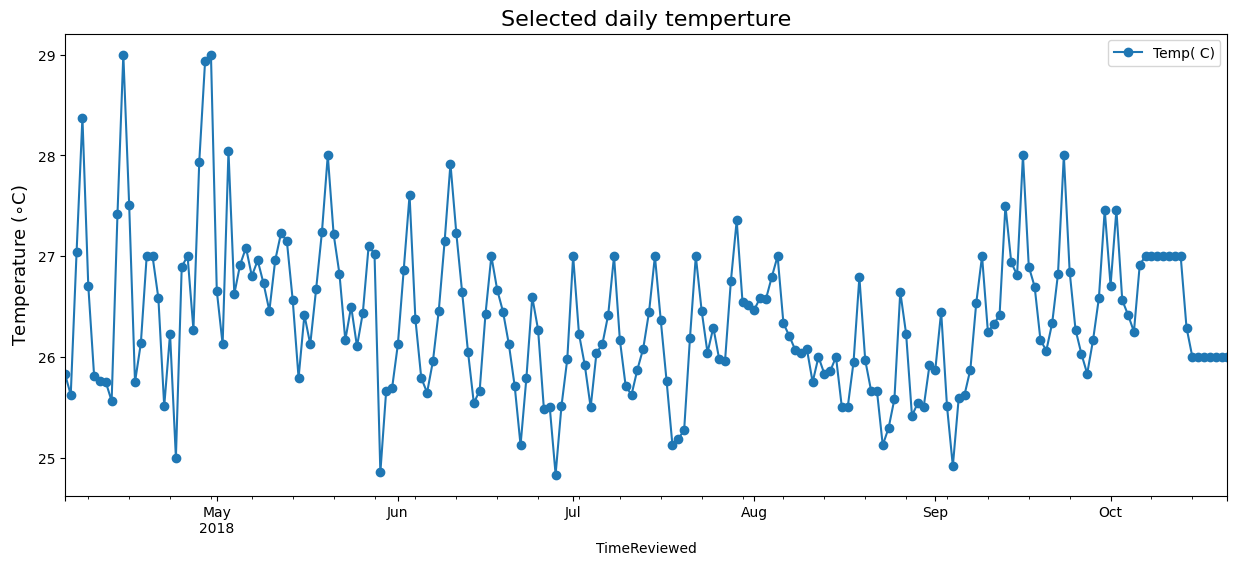

In [59]:
plt.figure()
fig = weatherdaily.plot(y = 'Temp( C)', figsize = (15, 6))
plt.title('Daily temperture', fontsize = 16)
plt.ylabel(r'Temperature ($\circ$C)')
plt.show()


plt.figure()
fig = weatherdaily.iloc[100:300].plot(y = 'Temp( C)', figsize = (15, 6), marker = 'o')
plt.title('Selected daily temperture',fontsize = 16)
plt.ylabel(r'Temperature ($\circ$C)',fontsize = 13)
plt.show()

<ipython-input-60-c9e8f830bbef>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  weatherhourly['Temp( C)'].resample('M').mean().plot(kind='bar')


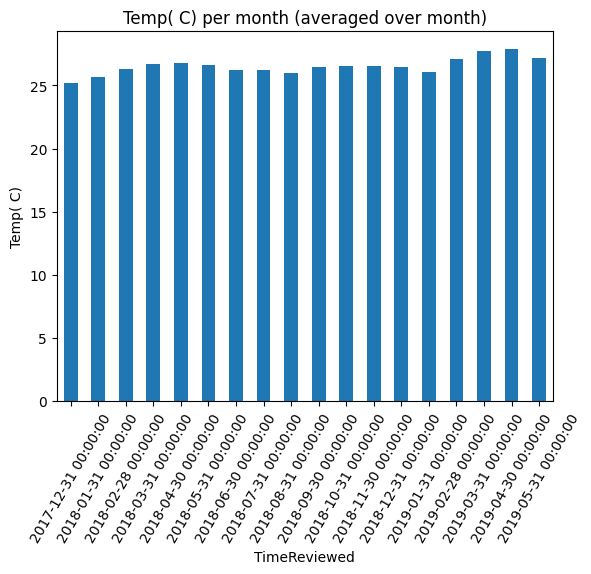

In [60]:
weatherhourly['Temp( C)'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Temp( C)')
plt.title('Temp( C) per month (averaged over month)')
plt.show()

<ipython-input-61-67f8cd0b8391>:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  weatherhourly['Temp( C)'].resample('Q').mean().plot(kind='bar')


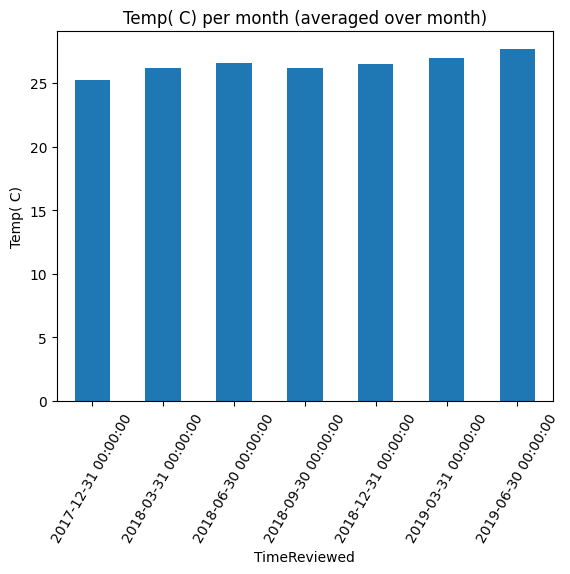

In [61]:
weatherhourly['Temp( C)'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Temp( C)')
plt.title('Temp( C) per month (averaged over month)')
plt.show()

**Employee Count**

In [62]:
employee= pd.read_excel("/content/drive/MyDrive/SolarGeneration_Data (2).xlsx",sheet_name=5)
employee_data = pd.DataFrame(data=employee,columns=['DATE','EmployeeCount'])
employee_data.head(10)

,DATE,EmployeeCount
0,2019-05-14,103
1,2019-05-14,90
2,2019-05-13,100
3,2019-05-13,86
4,2019-05-12,11
5,2019-05-11,88
6,2019-05-11,78
7,2019-05-10,92
8,2019-05-10,92
9,2019-05-09,99


In [63]:
employee_data['TimeReviewed'] = pd.to_datetime(employee_data['DATE'])
employee_data = employee_data.set_index('TimeReviewed')
employee_data.drop(['DATE'], axis=1, inplace=True)
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 972 entries, 2019-05-14 to 2017-12-26
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   EmployeeCount  972 non-null    int64
dtypes: int64(1)
memory usage: 15.2 KB


In [64]:
empdaily = employee_data.resample('D').sum()
empdaily

,EmployeeCount
TimeReviewed,
2017-12-26,121
2017-12-27,0
2017-12-28,0
2017-12-29,0
2017-12-30,0
...,...
2019-05-10,184
2019-05-11,166
2019-05-12,11


<Figure size 640x480 with 0 Axes>

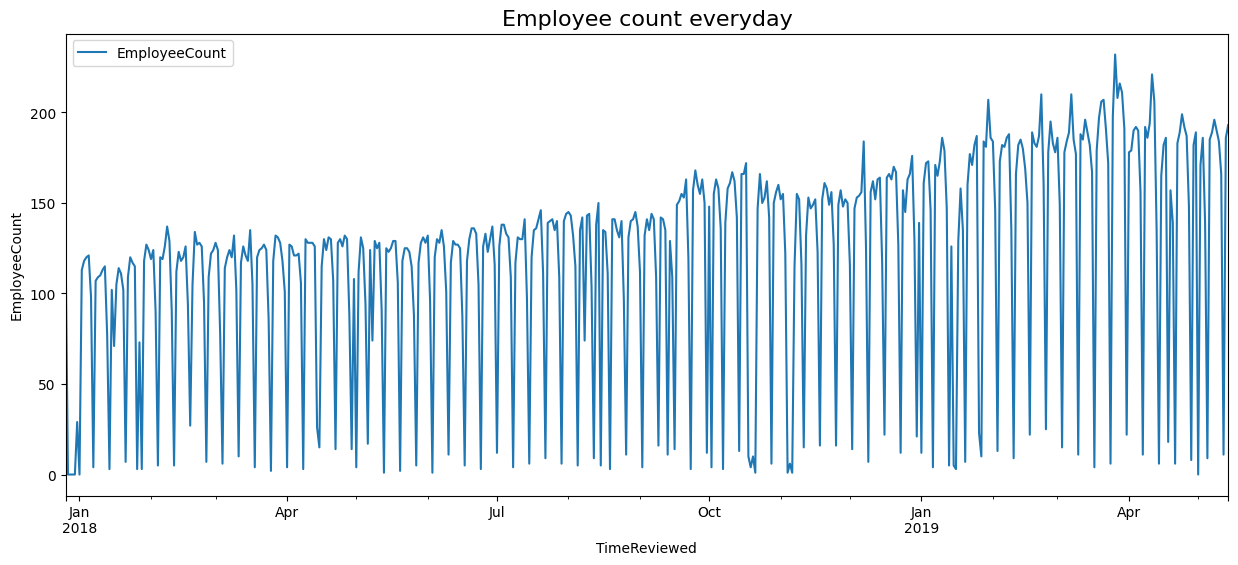

<Figure size 640x480 with 0 Axes>

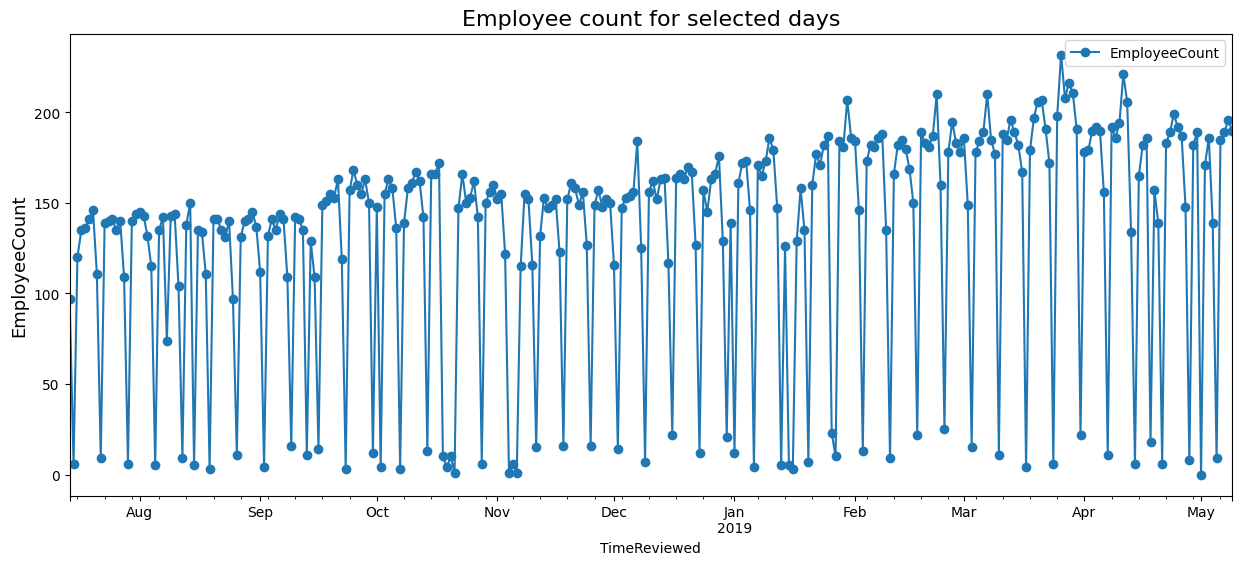

In [65]:
plt.figure()
fig = empdaily.plot(y = 'EmployeeCount', figsize = (15, 6))
plt.title('Employee count everyday', fontsize = 16)
plt.ylabel(r'EmployeeCount')
plt.show()


plt.figure()
fig = empdaily.iloc[200:500].plot(y = 'EmployeeCount', figsize = (15, 6), marker = 'o')
plt.title('Employee count for selected days',fontsize = 16)
plt.ylabel(r'EmployeeCount',fontsize = 13)
plt.show()

In [66]:
dailyEnergyWithFeatures = energydaily.join(weatherdaily, how = 'inner')
dailyEnergyWithFeatures = dailyEnergyWithFeatures.join(empdaily, how = 'inner')
dailyEnergyWithFeatures.dropna(axis=0, how='any', inplace = True)
dailyEnergyWithFeatures.to_excel('/content/drive/MyDrive/dailyEnergyWithFeatures.xlsx')
dailyEnergyWithFeatures.head(10)


,Solar_Power_Consumption(Kw),Temp( C),EmployeeCount
TimeReviewed,,,
2017-12-26,12782.411988,25.000000,121
2017-12-27,13883.010020,25.375000,0
2017-12-28,13766.083029,24.833333,0
2017-12-29,12904.092990,24.833333,0
2017-12-30,7985.972000,25.906250,0
2017-12-31,0.000000,25.343750,29
2018-01-01,0.000000,25.666667,0
2018-01-02,11703.730007,25.416667,113
2018-01-03,9560.972003,24.708333,118


In [67]:
dailyEnergyWithFeatures.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2017-12-26 to 2019-05-14
Freq: D
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Solar_Power_Consumption(Kw)  505 non-null    float64
 1   Temp( C)                     505 non-null    float64
 2   EmployeeCount                505 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 15.8 KB


**Compare each column resampled over a week**

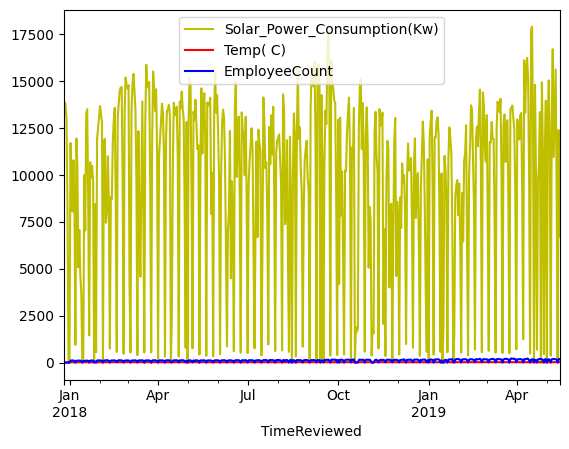

In [68]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split # to s

plt.figure()
## resampling over week and computing mean
#dailyEnergyWithFeatures[dailyEnergyWithFeatures[['TimeReviewed']] .notnull()].set_index('TimeReviewed').resample('W')
fig = dailyEnergyWithFeatures['Solar_Power_Consumption(Kw)'].plot(color='y', legend=True)
dailyEnergyWithFeatures['Temp( C)'].plot(color='r', legend=True)
dailyEnergyWithFeatures['EmployeeCount'].plot(color='b', legend=True)
plt.show()


**EXPLORATORY DATA ANALYSIS**

In [69]:
%matplotlib inline

import requests
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting
import datetime as dt # module for manipulating dates and times
import numpy.linalg as lin # module for performing linear algebra operations
from __future__ import division
import matplotlib
from datetime import date
import holidays


In [70]:
dailyEnergyWithFeatures = pd.read_excel('/content/drive/MyDrive/dailyEnergyWithFeatures.xlsx')

**Correlation between number of employees and Solar energy**

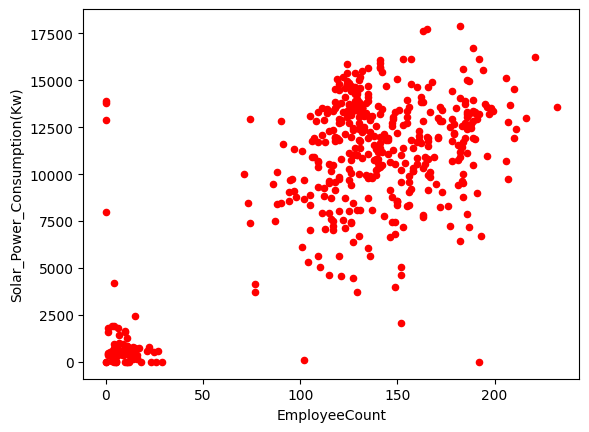

In [71]:
dailyEnergyWithFeatures.plot(kind='scatter',x='EmployeeCount',y='Solar_Power_Consumption(Kw)',color='red')
plt.show()

**Correlation between Temperature and Solar energy**

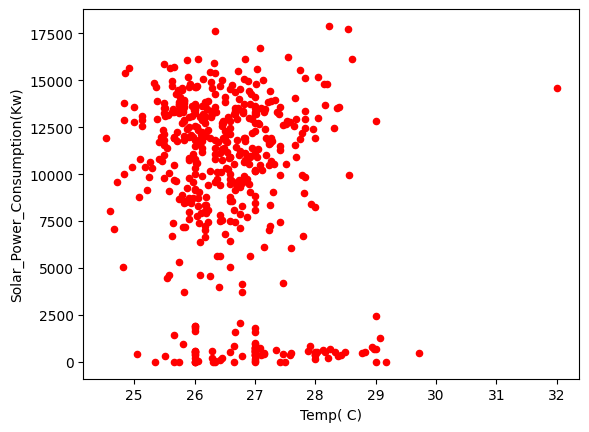

In [72]:
dailyEnergyWithFeatures.plot(kind='scatter',x='Temp( C)',y='Solar_Power_Consumption(Kw)',color='red')
plt.show()